<a href="https://colab.research.google.com/github/James56555/Python-/blob/main/RegressionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
s = pd.read_csv("/content/drive/MyDrive/Dataset/Movie_regression.csv", header=0)
df = pd.DataFrame(s)


In [ ]:
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

Missing Value Imputation

In [ ]:
df['Time_taken'].mean()

In [ ]:
df['Time_taken'].fillna(value = df['Time_taken'].mean(), inplace = True)

In [ ]:
df.info()

In [ ]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [ ]:
df = pd.get_dummies(df,columns = ["3D_available","Genre"],drop_first = True)

In [ ]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,True,False,False,True
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,False,False,True,False
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,False,True,False,False
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,True,False,True,False
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,False,False,True,False


In [ ]:
df['3D_available_YES'] = df['3D_available_YES'].astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  Collection           506 non-null    int

In [ ]:
df['Genre_Comedy'] = df['Genre_Comedy'].astype(int)
df['Genre_Drama'] = df['Genre_Drama'].astype(int)
df["Genre_Thriller"] = df["Genre_Thriller"].astype(int)


In [ ]:
df.info()

In [ ]:
X = df.loc[:,df.columns!="Collection"]
type(X)


In [ ]:
X

In [ ]:
y = df["Collection"]
type(y)

In [ ]:
y

In [ ]:
df.info()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [ ]:
X_train.head()

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [ ]:
regtree.fit(X_train, y_train)

In [ ]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [ ]:
y_test_pred

In [ ]:
y_train_pred

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mean_squared_error(y_test, y_test_pred)

53186393.30490645

In [ ]:
r2_score(y_train, y_train_pred)

In [ ]:
r2_score(y_test, y_test_pred)

In [ ]:
dot_data = tree.export_graphviz(regtree, out_file=None,feature_names= X_train.columns, filled = True)

In [ ]:
from IPython.display import Image

In [ ]:
import pydotplus

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

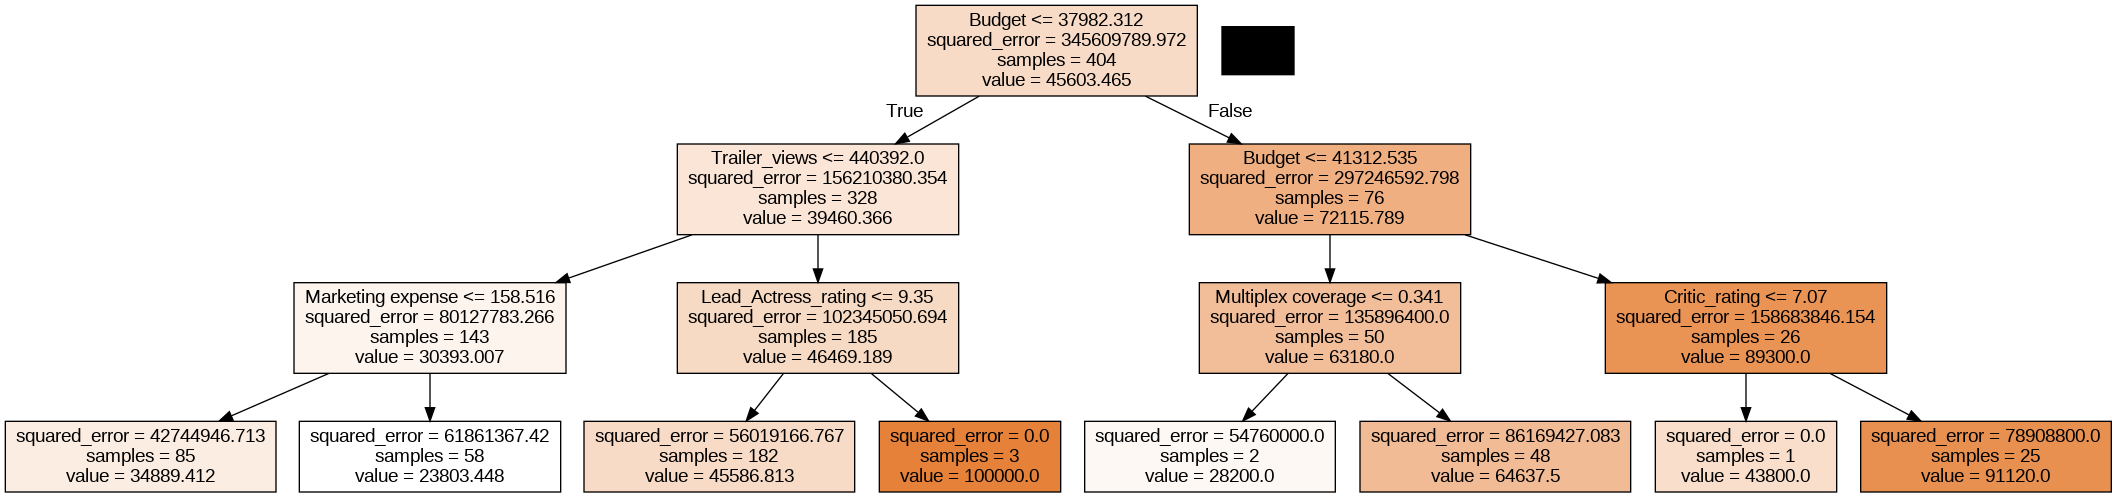

In [ ]:
regtree1 = tree.DecisionTreeRegressor(max_depth = 3)
regtree1.fit(X_train, y_train)
dot_data = tree.export_graphviz(regtree1, out_file=None,feature_names= X_train.columns, filled = True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

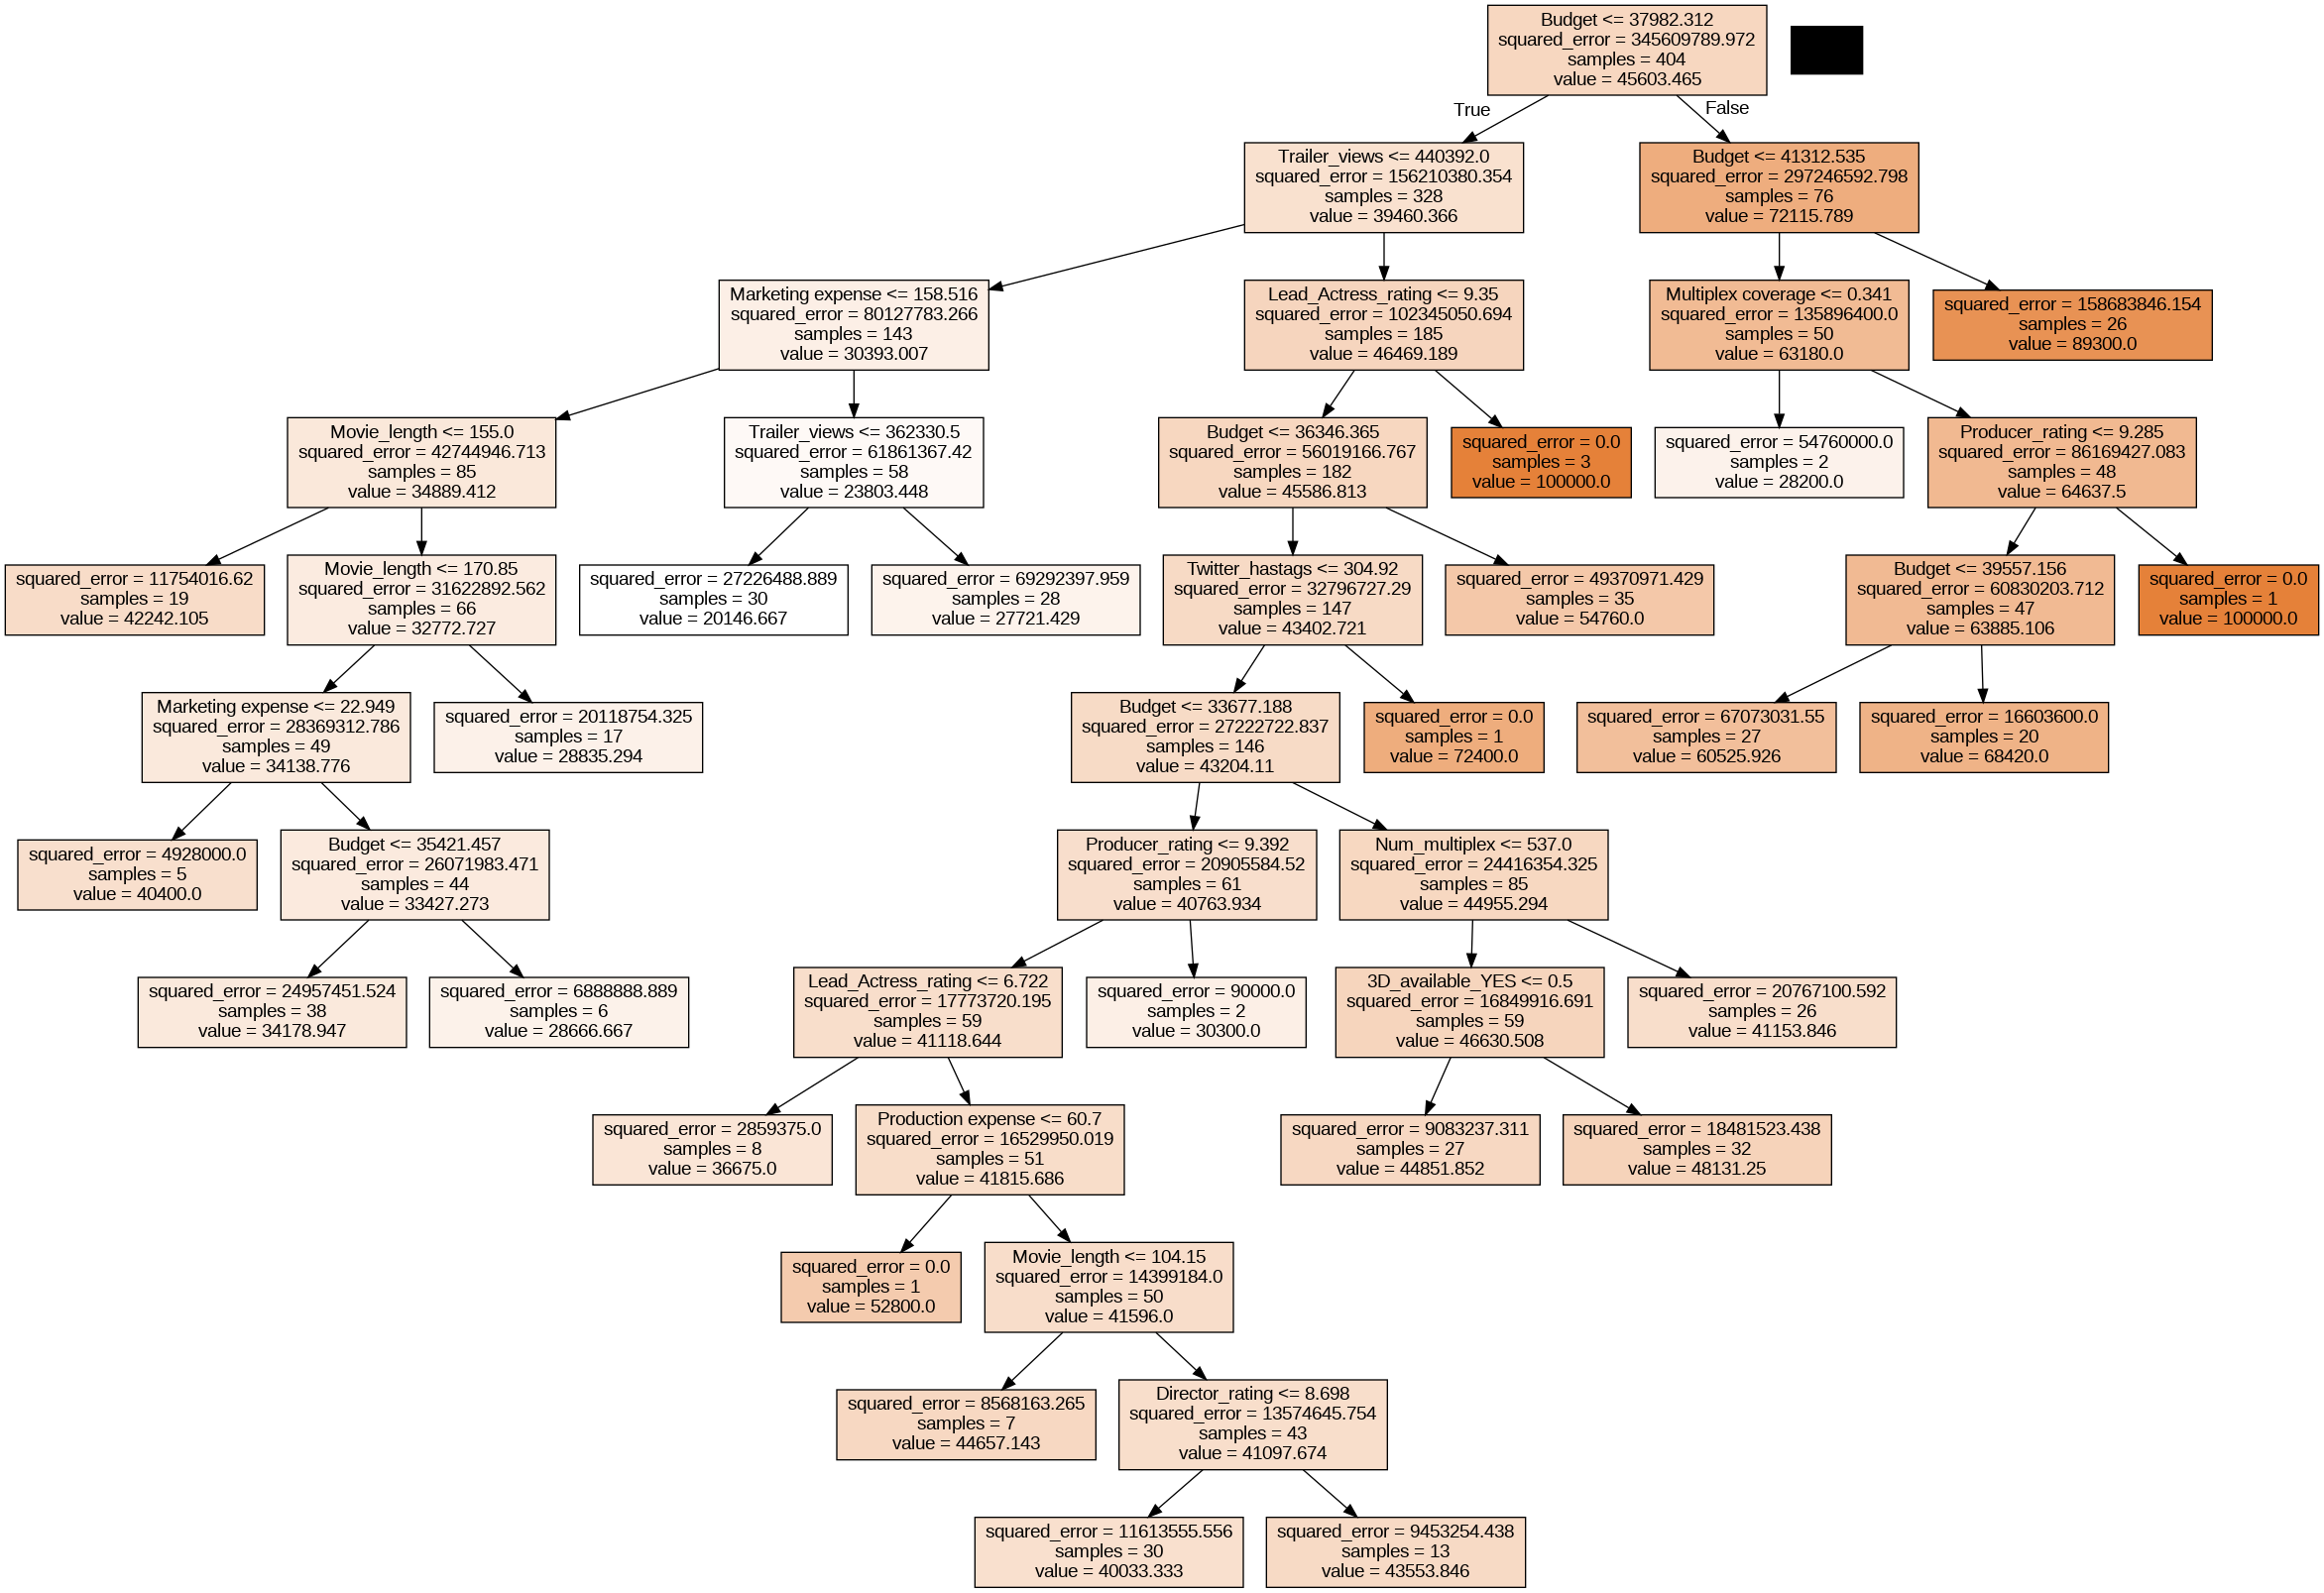

In [ ]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 40)
regtree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(regtree2, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [ ]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 40)
regtree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(regtree2, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

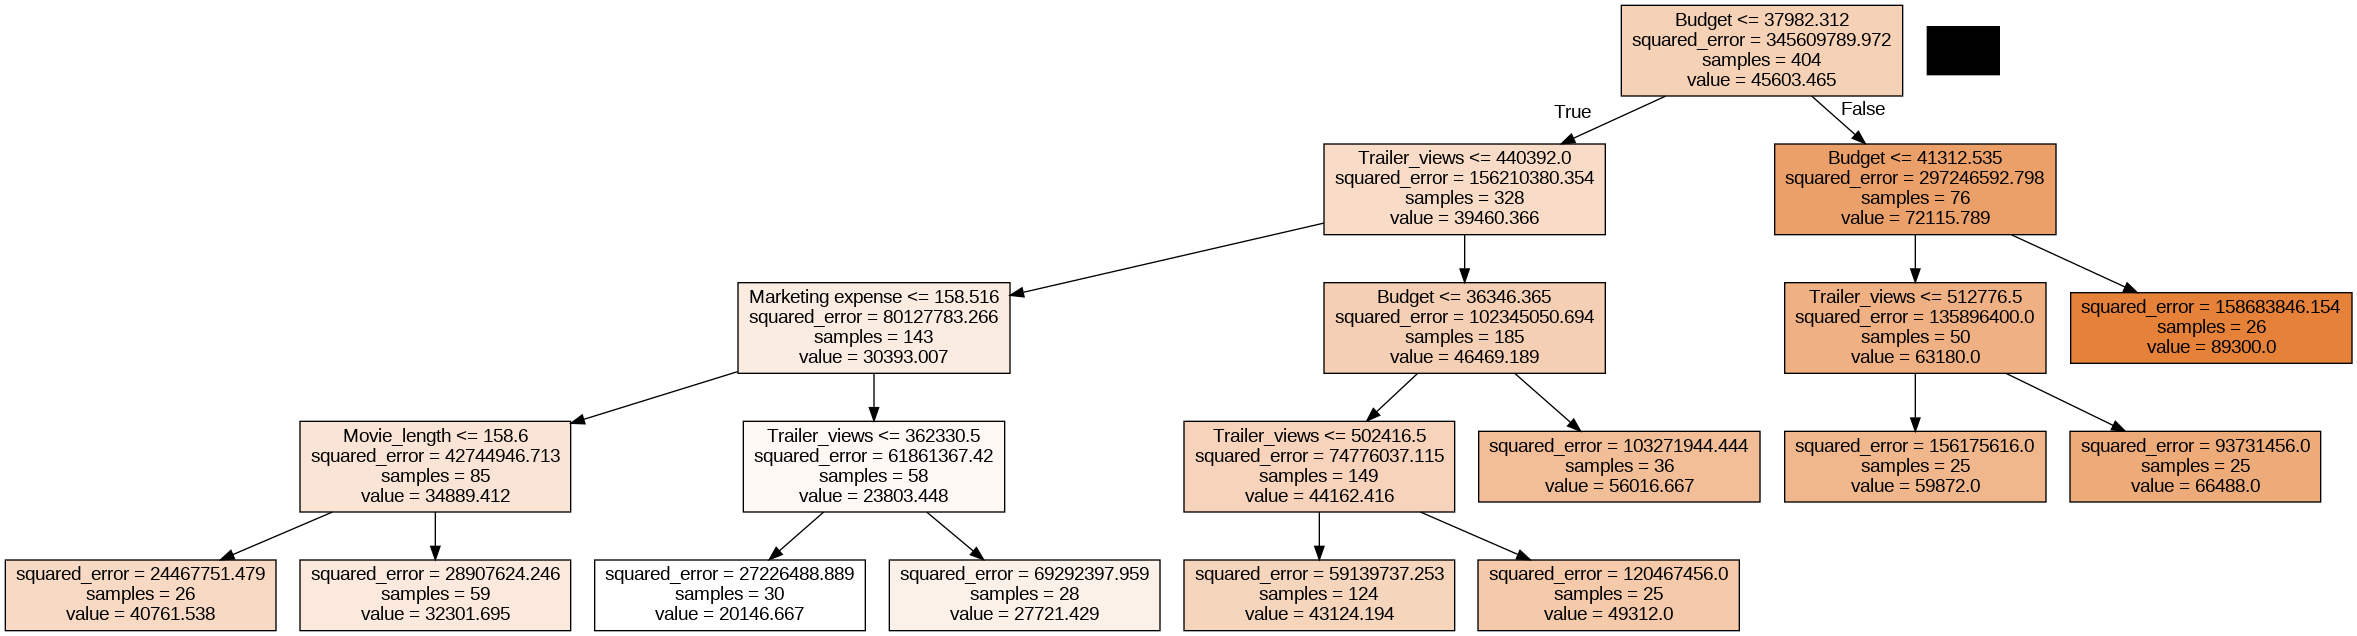

In [ ]:
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 25, max_depth=4)
regtree3.fit(X_train, y_train)
dot_data = tree.export_graphviz(regtree3, out_file=None,feature_names= X_train.columns, filled = True)
graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())

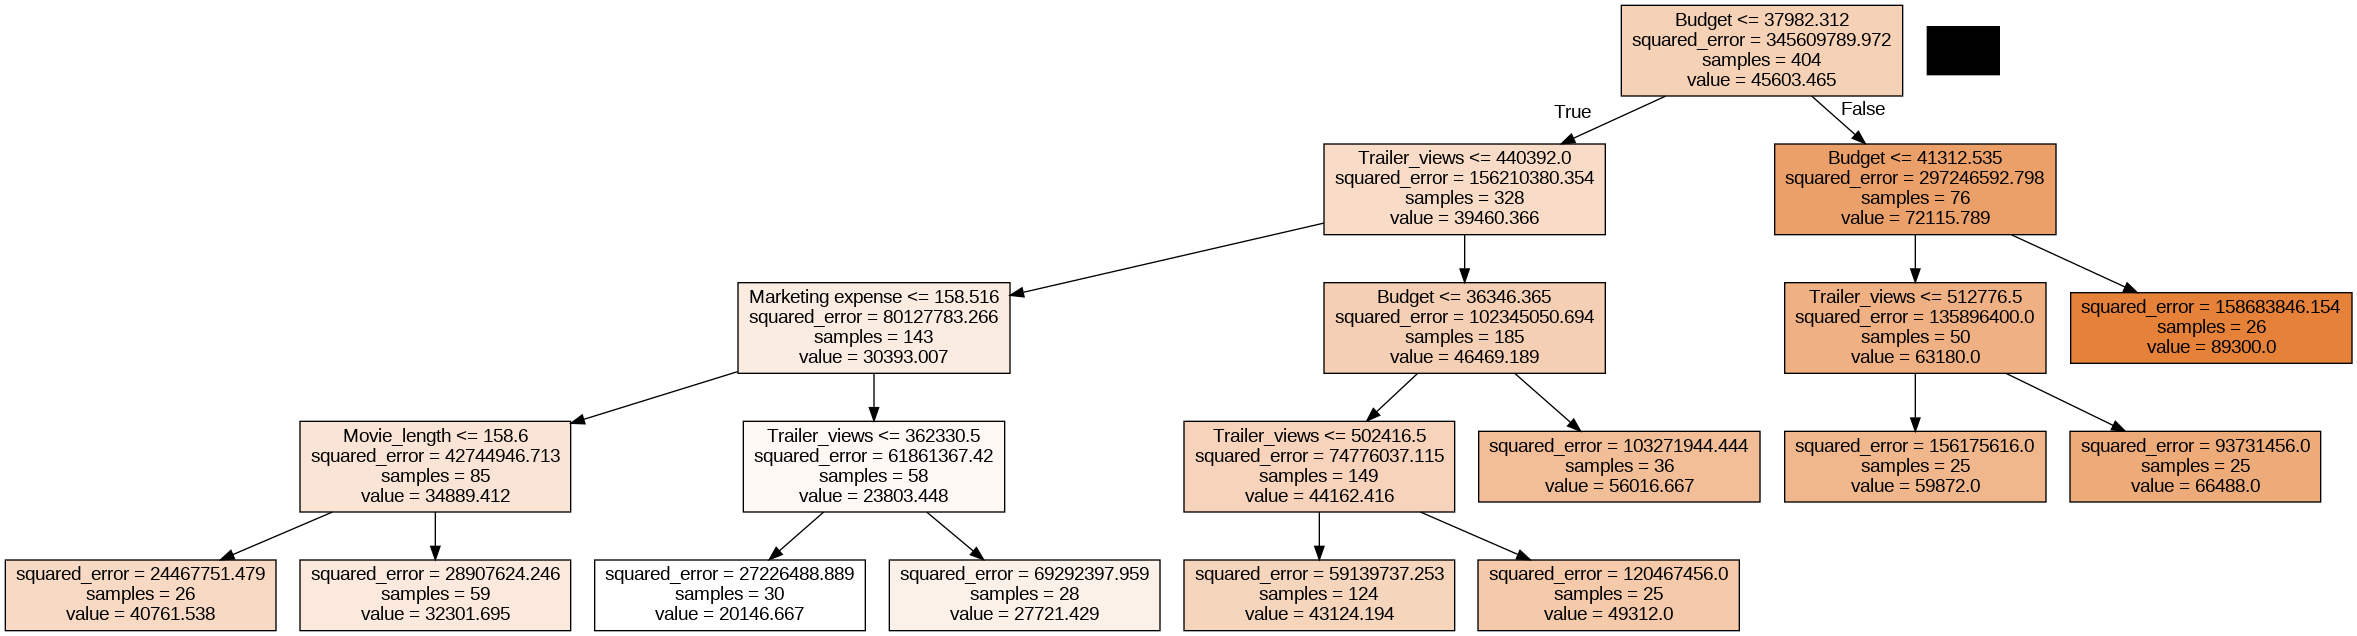

In [ ]:
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 25, max_depth=4)
regtree3.fit(X_train, y_train)
dot_data = tree.export_graphviz(regtree3, out_file=None,feature_names= X_train.columns, filled = True)
graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())